## 23. Scenario
You are a researcher working in a medical lab, investigating the effectiveness of a new treatment  
for a specific disease. You conducted a clinical trial with **two groups**:

- **Control Group** → received a placebo  
- **Treatment Group** → received the new drug  

Your goal is to analyze the clinical trial data using **hypothesis testing** to determine whether the  
new treatment has a statistically significant effect compared to the placebo.  
You will also use the **matplotlib** library to visualize the data and the p-value.

## Question
Using the collected clinical trial data, perform a hypothesis test (two-sample t-test) to determine  
whether there is a statistically significant difference between the mean outcomes of the treatment  
group and the placebo group.  
Also, use matplotlib to visualize both groups and annotate the p-value on the plot.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv("clinical_trial.csv")

control = df[df["group"] == "control"]["outcome"].values
treatment = df[df["group"] == "treatment"]["outcome"].values
df

,group,outcome
0,control,12.1
1,control,10.5
2,control,11.3
3,control,9.8
4,control,13.0
5,control,12.4
6,control,11.0
7,control,10.2
8,control,12.8
9,control,11.6


In [3]:
t_stat, p_value = stats.ttest_ind(treatment, control, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 16.311840210265743
P-value: 4.396528519245897e-12


In [4]:
alpha = 0.05
if p_value < alpha:
    print("\nConclusion:  The treatment has a statistically significant effect.")
else:
    print("\nConclusion:  No statistically significant difference found.")


Conclusion:  The treatment has a statistically significant effect.


C:\Users\thara\AppData\Local\Temp\ipykernel_25184\3802069647.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([control, treatment], labels=["Control", "Treatment"], patch_artist=True)


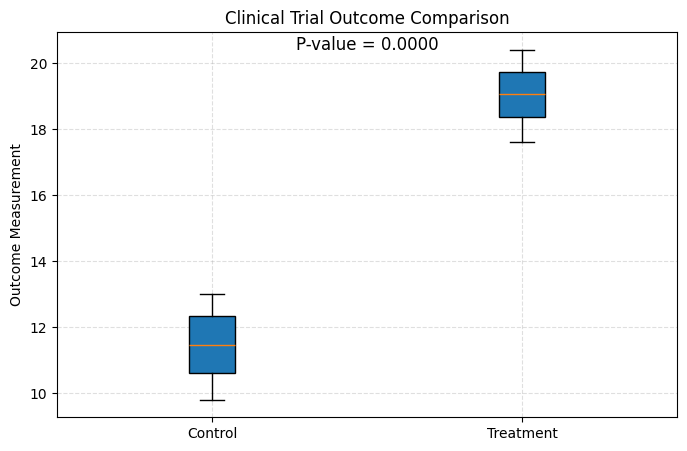

In [7]:
plt.figure(figsize=(8, 5))
plt.boxplot([control, treatment], labels=["Control", "Treatment"], patch_artist=True)
plt.title("Clinical Trial Outcome Comparison")
plt.ylabel("Outcome Measurement")
plt.text(1.5, max(df["outcome"]), f"P-value = {p_value:.4f}", ha='center', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()